# Preview dataset

In [ ]:
import pandas as pd
## https://archive.ics.uci.edu/ml/datasets/Auto+MPG
df = pd.read_csv('auto.csv')
## mpg: 每加侖燃料所行英里數；displacement: 排氣量；horsepower: 馬力；acceleration: 加速度
df.info()

In [ ]:
df.head()

In [ ]:
import numpy as np
## 將 origin 中的字符串轉為整數，以方便後續處理
def convert_origin(value):
    new_value = value.replace('Asia', '0').replace('Europe', '1').replace('US', '2')
    return np.int(new_value)

df['origin'] = df['origin'].apply(convert_origin)
df.head()

In [ ]:
from pandas.plotting import scatter_matrix
_ = scatter_matrix(df, figsize = [8, 8])

In [ ]:
import matplotlib.pyplot as plt
df.plot(kind='scatter', x='size', y='displ')

plt.title('Displacement vs Size')
plt.xlabel('Size')
plt.ylabel('Displacement')

plt.show()

In [ ]:
df.plot(kind='scatter', x='weight', y='mpg')

plt.title('Fuel efficiency vs Weight')
plt.xlabel('Weight')
plt.ylabel('Fuel efficiency (mpg)')

plt.show()

# Classification

In [78]:
from sklearn.model_selection import train_test_split

## 通過排氣量推算體積
## Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
X = df['displ'].values.reshape(-1, 1)
## You are passing floats to a classifier which expects categorical values as the target vector
y = df['size'].values.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

def get_classifier(Model):
    model = Model()
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))
    return model

print(X[:10])
print(y[:10])

[[250.]
 [304.]
 [ 91.]
 [250.]
 [ 97.]
 [119.]
 [108.]
 [121.]
 [302.]
 [302.]]
[15 20 10 15 10 10 10 10 20 20]


In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn = get_classifier(KNeighborsClassifier)

0.9795918367346939


In [84]:
from sklearn.linear_model import LogisticRegression

lr_ovr = get_classifier(LogisticRegression)

0.7448979591836735
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [81]:
from sklearn.svm import SVC

svm = get_classifier(SVC)

0.9897959183673469
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [85]:
from sklearn.svm import LinearSVC

l_svm = get_classifier(LinearSVC)

0.7346938775510204
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Multi-class

In [83]:
lr_mn = LogisticRegression(multi_class="multinomial", solver="lbfgs")
lr_mn.fit(X_train, y_train)
lr_mn.score(X_test, y_test)

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9897959183673469

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

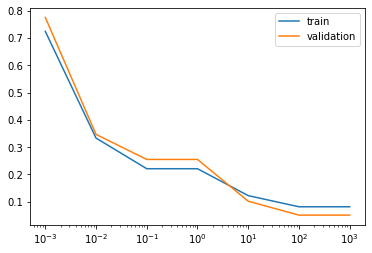

In [88]:
# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Loop over values of C_value
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_test, y_test) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

In [ ]:

from sklearn.linear_model import Ridge

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
ridge = Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)
ridge.score(X_test, y_test)